Import necessary libraries. Here, we select the Voronoi-Elites QD algorithm for SPHEN's internal archive creation. 

In [30]:
%%capture cap --no-stderr

import yaml
import time
import pickle

from sphen import sphen
from qd.voronoielites import visualize, visualize_phenotypes
from domain.simpleshapes import init, fitness_fun, express

Load SPHEN and domain configuration, including first population.
The simple shapes domain creates a set of splines of various area and perimeter values, optimized for vertical symmetry (x-axis is the line of symmetry).

In [23]:
config = yaml.safe_load(open("sphen/config.yml"))
domain, random_pop = init.do(config.get('init_samples'))


Evolve archive with SPHEN and dump archive to root folder

In [24]:
start = time.time()
archive = sphen.evolve(random_pop, config, domain, fitness_fun)
print(f'Time elapsed: {time.time() - start:.2}s.')

with open('archive_sphen.pkl', 'wb') as f:
    pickle.dump(archive, f)

Current samples: 64/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500


 /home/alex/anaconda3/envs/sphenpy/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


Current samples: 74/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 84/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 94/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 104/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 114/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 124/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 134/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 144/200
Generation: 0/500
Generation: 100/500
Generation: 200/500
Generation: 300/500
Generation: 400/500
Current samples: 15

Visualization of archive (fitness and phenotypes). Be sure to load the QD configuration for visualization.

TODO: the axis labels are incorrectly scaled.

{'name': 'simpleshapes', 'features': [0, 1], 'labels': ['area', 'circumference', 'mirrorsymmetry'], 'dof': 16, 'nfeatures': 2, 'par_ranges': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, -0.38, -0.38, -0.38, -0.38, -0.38, -0.38, -0.38, -0.38], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38]], 'feat_ranges': [[0.0, 0.0], [0.5, 3]], 'fit_range': [0, 1], 'plotscale': True, 'base': [array([ 5.00000000e-01,  3.53553391e-01,  3.06161700e-17, -3.53553391e-01,
       -5.00000000e-01, -3.53553391e-01, -9.18485099e-17,  3.53553391e-01]), array([ 0.00000000e+00,  3.53553391e-01,  5.00000000e-01,  3.53553391e-01,
        6.12323400e-17, -3.53553391e-01, -5.00000000e-01, -3.53553391e-01])]}


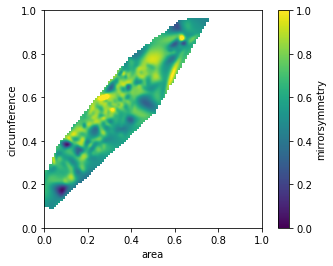

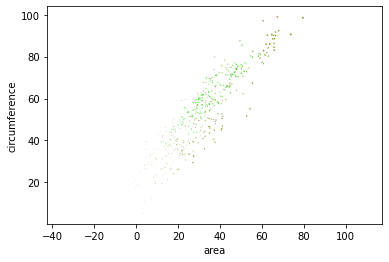

In [36]:
figure = visualize.plot(archive, domain)
figure.savefig('results/SPHEN predicted fitness', dpi=72)
qdconfig = yaml.safe_load(open("qd/voronoielites/config.yml"))
figure = visualize_phenotypes.plot(archive, express, domain, qdconfig)
print(domain)
figure.savefig('results/SPHEN predicted phenotypes', dpi=72)
